In [4]:
import pandas as pd

In [9]:
data = pd.read_csv("../data/Cabernet_Sauvignon.csv")

In [11]:
data.shape

(11639109, 10)

In [12]:
data.columns

Index(['ITEM_KEY', 'STORE_KEY', 'STATE_ABBR', 'PRICE_ZONE_NAME', 'FISCAL_YEAR',
       'FISCAL_WEEK', 'SALES_DOLLARS', 'TOTAL_DISCOUNT', 'LTS_DISCOUNT',
       'SALES_QUANTITY'],
      dtype='object')

In [13]:
data.dtypes

ITEM_KEY           float64
STORE_KEY            int64
STATE_ABBR          object
PRICE_ZONE_NAME     object
FISCAL_YEAR          int64
FISCAL_WEEK          int64
SALES_DOLLARS      float64
TOTAL_DISCOUNT     float64
LTS_DISCOUNT       float64
SALES_QUANTITY       int64
dtype: object

In [14]:
data.nunique()

ITEM_KEY              4101
STORE_KEY              254
STATE_ABBR              28
PRICE_ZONE_NAME         69
FISCAL_YEAR              4
FISCAL_WEEK             53
SALES_DOLLARS       207567
TOTAL_DISCOUNT     1238928
LTS_DISCOUNT          1606
SALES_QUANTITY        1019
dtype: int64

In [15]:
data.head()

,ITEM_KEY,STORE_KEY,STATE_ABBR,PRICE_ZONE_NAME,FISCAL_YEAR,FISCAL_WEEK,SALES_DOLLARS,TOTAL_DISCOUNT,LTS_DISCOUNT,SALES_QUANTITY
0,20.0,1501,CT,Southern CT,2020,2,95.88,NaN,0.0,12
1,20.0,1501,CT,Southern CT,2020,5,7.99,NaN,0.0,1
2,20.0,2401,IL,Southern Illinois,2020,28,5.84,0.649,0.0,1
3,20.0,2401,IL,Southern Illinois,2020,48,5.84,0.650,0.0,1
4,20.0,2401,IL,Southern Illinois,2021,14,5.84,0.650,0.0,1


In [16]:
data["TOTAL_DISCOUNT"].fillna(0,inplace=True)

Adding Quarters of the year for each week

In [17]:
data["QUARTER_YEAR"] = "Q"

year2020data = data[data["FISCAL_YEAR"]==2020]
year2021data = data[data["FISCAL_YEAR"]==2021]
year2022data = data[data["FISCAL_YEAR"]==2022]
year2023data = data[data["FISCAL_YEAR"]==2023]

data.loc[data["FISCAL_WEEK"].between(1, 14) , "QUARTER_YEAR"] = "Q1"
data.loc[data["FISCAL_WEEK"].between(15, 27), "QUARTER_YEAR"] = "Q2"
data.loc[data["FISCAL_WEEK"].between(28, 40), "QUARTER_YEAR"] = "Q3"
data.loc[data["FISCAL_WEEK"].between(41, 53), "QUARTER_YEAR"] = "Q4"

data.loc[data["FISCAL_WEEK"].between(1, 13) & (data["FISCAL_YEAR"] == 2020), "QUARTER_YEAR"] = "Q1"
data.loc[data["FISCAL_WEEK"].between(14, 26) & (data["FISCAL_YEAR"] == 2020), "QUARTER_YEAR"] = "Q2"
data.loc[data["FISCAL_WEEK"].between(27, 40) & (data["FISCAL_YEAR"] == 2020), "QUARTER_YEAR"] = "Q3"

data.loc[data["FISCAL_WEEK"].between(1, 13) & (data["FISCAL_YEAR"] == 2023), "QUARTER_YEAR"] = "Q1"
data.loc[data["FISCAL_WEEK"].between(14, 26) & (data["FISCAL_YEAR"] == 2023), "QUARTER_YEAR"] = "Q2"
data.loc[data["FISCAL_WEEK"].between(27, 39) & (data["FISCAL_YEAR"] == 2023), "QUARTER_YEAR"] = "Q3"
data.loc[data["FISCAL_WEEK"].between(40, 53) & (data["FISCAL_YEAR"] == 2023), "QUARTER_YEAR"] = "Q4"


In [18]:
data.head()

,ITEM_KEY,STORE_KEY,STATE_ABBR,PRICE_ZONE_NAME,FISCAL_YEAR,FISCAL_WEEK,SALES_DOLLARS,TOTAL_DISCOUNT,LTS_DISCOUNT,SALES_QUANTITY,QUARTER_YEAR
0,20.0,1501,CT,Southern CT,2020,2,95.88,0.000,0.0,12,Q1
1,20.0,1501,CT,Southern CT,2020,5,7.99,0.000,0.0,1,Q1
2,20.0,2401,IL,Southern Illinois,2020,28,5.84,0.649,0.0,1,Q3
3,20.0,2401,IL,Southern Illinois,2020,48,5.84,0.650,0.0,1,Q4
4,20.0,2401,IL,Southern Illinois,2021,14,5.84,0.650,0.0,1,Q1


Converting categorical columns containing numerical value to object types

In [19]:
data["ITEM_KEY"] = data["ITEM_KEY"].astype("object")
data["STORE_KEY"] = data["STORE_KEY"].astype("object")
data["FISCAL_YEAR"] = data["FISCAL_YEAR"].astype("object")
data["FISCAL_WEEK"] = data["FISCAL_WEEK"].astype("object")

In [20]:
data.dtypes

ITEM_KEY            object
STORE_KEY           object
STATE_ABBR          object
PRICE_ZONE_NAME     object
FISCAL_YEAR         object
FISCAL_WEEK         object
SALES_DOLLARS      float64
TOTAL_DISCOUNT     float64
LTS_DISCOUNT       float64
SALES_QUANTITY       int64
QUARTER_YEAR        object
dtype: object

**HEATMAP**

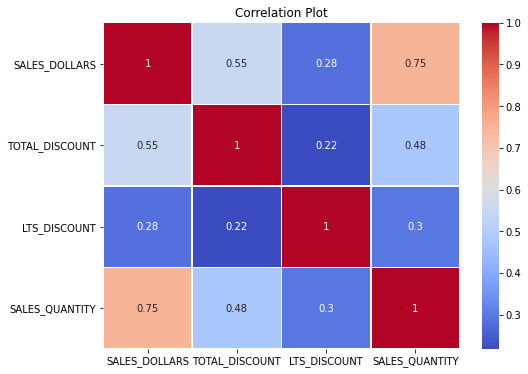

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

**SALES_DATA**

In [ ]:
sale_data = data[data["SALES_QUANTITY"]>0]
sale_data = sale_data[sale_data["SALES_DOLLARS"]>0]
sale_data = sale_data[sale_data["TOTAL_DISCOUNT"]>=0]
sale_data = sale_data[sale_data["LTS_DISCOUNT"]>=0]


In [ ]:
data.shape

(11639109, 11)

In [ ]:
sale_data.shape

(11596195, 11)

Calculating Individual price or unit price

In [ ]:
sale_data['INDIVIDUAL_PRICE'] = 0

sale_data['INDIVIDUAL_PRICE'] = (sale_data['SALES_DOLLARS'] + sale_data['TOTAL_DISCOUNT'] + sale_data['LTS_DISCOUNT']) / sale_data['SALES_QUANTITY']

In [ ]:
sale_data["GIVEN_PRICE"]= sale_data["SALES_DOLLARS"]/sale_data["SALES_QUANTITY"]

In [ ]:
sale_data["TOTAL_DISCOUNT%"] = round(100*((sale_data['INDIVIDUAL_PRICE']- sale_data['GIVEN_PRICE'])/sale_data['INDIVIDUAL_PRICE']),2)

In [ ]:
sale_data.drop(columns={'TOTAL_DISCOUNT','LTS_DISCOUNT'},inplace=True)

In [ ]:
sale_data.head()

,ITEM_KEY,STORE_KEY,STATE_ABBR,PRICE_ZONE_NAME,FISCAL_YEAR,FISCAL_WEEK,SALES_DOLLARS,SALES_QUANTITY,QUARTER_YEAR,INDIVIDUAL_PRICE,GIVEN_PRICE,TOTAL_DISCOUNT%
0,20.0,1501,CT,Southern CT,2020,2,95.88,12,Q1,7.990,7.99,0.00
1,20.0,1501,CT,Southern CT,2020,5,7.99,1,Q1,7.990,7.99,0.00
2,20.0,2401,IL,Southern Illinois,2020,28,5.84,1,Q3,6.489,5.84,10.00
3,20.0,2401,IL,Southern Illinois,2020,48,5.84,1,Q4,6.490,5.84,10.02
4,20.0,2401,IL,Southern Illinois,2021,14,5.84,1,Q1,6.490,5.84,10.02


In [ ]:
sale_data.nunique()

ITEM_KEY               4095
STORE_KEY               254
STATE_ABBR               28
PRICE_ZONE_NAME          69
FISCAL_YEAR               4
FISCAL_WEEK              53
SALES_DOLLARS        198683
SALES_QUANTITY          935
QUARTER_YEAR              4
INDIVIDUAL_PRICE    1389292
GIVEN_PRICE          824509
TOTAL_DISCOUNT%        6975
dtype: int64

In [ ]:
sale_data.shape

(11596195, 12)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

@interact
def check(column = list(sale_data.select_dtypes('number').columns)):
    max = sale_data[column].max()
    min = sale_data[column].min()
    avg = sale_data[column].mean()
    median = sale_data[column].median()
    var = sale_data[column].var()
    std = sale_data[column].std()
    percentile1 = sale_data[column].quantile(0.25)
    percentile3 = sale_data[column].quantile(0.95)
    print("Max Value :", max)
    print("Minimum Value :", min)
    print("Average Value :", avg)
    print("Variance :", var)
    print("Median :", median)
    print("Standard Deviation :", std)
    print("25 Percentile :", percentile1)
    print("75 Percentile :", percentile3)

interactive(children=(Dropdown(description='column', options=('SALES_DOLLARS', 'SALES_QUANTITY', 'INDIVIDUAL_P…

In [10]:
sale_data.to_csv("../data/segmentation_data.csv", index=False)

NameError: name 'sale_data' is not defined

## **TIME SEGMENTATION (QUARTERLY)**

In [ ]:
dum_data = sale_data

In [ ]:
dum_data.head()

,ITEM_KEY,STORE_KEY,STATE_ABBR,PRICE_ZONE_NAME,FISCAL_YEAR,FISCAL_WEEK,SALES_DOLLARS,SALES_QUANTITY,QUARTER_YEAR,INDIVIDUAL_PRICE,GIVEN_PRICE,TOTAL_DISCOUNT%
0,20.0,1501,CT,Southern CT,2020,2,95.88,12,Q1,7.990,7.99,0.000000
1,20.0,1501,CT,Southern CT,2020,5,7.99,1,Q1,7.990,7.99,0.000000
2,20.0,2401,IL,Southern Illinois,2020,28,5.84,1,Q3,6.489,5.84,10.001541
3,20.0,2401,IL,Southern Illinois,2020,48,5.84,1,Q4,6.490,5.84,10.015408
4,20.0,2401,IL,Southern Illinois,2021,14,5.84,1,Q1,6.490,5.84,10.015408


In [ ]:
dum_data.loc[((dum_data['ITEM_KEY'] == 20.0) & (dum_data['FISCAL_YEAR']==2020) & (dum_data['QUARTER_YEAR']=='Q1')), 'INDIVIDUAL_PRICE'].mean()

7.99

In [ ]:
dum_data[((dum_data['ITEM_KEY'] == 21.0) & (dum_data['FISCAL_YEAR']==2020) & (dum_data['QUARTER_YEAR']=='Q4'))]

,ITEM_KEY,STORE_KEY,STATE_ABBR,PRICE_ZONE_NAME,FISCAL_YEAR,FISCAL_WEEK,SALES_DOLLARS,SALES_QUANTITY,QUARTER_YEAR,INDIVIDUAL_PRICE,GIVEN_PRICE,TOTAL_DISCOUNT%
18,21.0,102,DE,Delaware,2020,41,199.97,1,Q4,199.970000,199.970,0.00
19,21.0,102,DE,Delaware,2020,44,199.97,1,Q4,199.970000,199.970,0.00
48,21.0,204,VA,N Virginia,2020,51,396.79,2,Q4,199.968378,198.395,0.79
81,21.0,208,VA,N Virginia,2020,52,399.94,2,Q4,199.970000,199.970,0.00
104,21.0,215,VA,N Virginia,2020,52,799.88,4,Q4,199.970000,199.970,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2390,21.0,2503,LA,New Orleans,2020,48,399.94,2,Q4,199.970000,199.970,0.00
2391,21.0,2503,LA,New Orleans,2020,52,199.97,1,Q4,199.970000,199.970,0.00
2395,21.0,2701,IN,Indianapolis,2020,48,179.97,1,Q4,179.970000,179.970,0.00
2396,21.0,2701,IN,Indianapolis,2020,50,1079.82,6,Q4,179.970000,179.970,0.00


In [ ]:
dum_data["TOTAL_DISCOUNT%"] = 100*((dum_data['INDIVIDUAL_PRICE']- dum_data['GIVEN_PRICE'])/dum_data['INDIVIDUAL_PRICE'])

In [ ]:
dum_data.drop(columns={'STORE_KEY','PRICE_ZONE_NAME','SALES_DOLLARS','INDIVIDUAL_PRICE','STATE_ABBR'}, inplace=True)

In [ ]:
dum_data.head()

,ITEM_KEY,FISCAL_YEAR,FISCAL_WEEK,SALES_QUANTITY,QUARTER_YEAR,GIVEN_PRICE,TOTAL_DISCOUNT%
0,20.0,2020,2,12,Q1,7.99,0.000000
1,20.0,2020,5,1,Q1,7.99,0.000000
2,20.0,2020,28,1,Q3,5.84,10.001541
3,20.0,2020,48,1,Q4,5.84,10.015408
4,20.0,2021,14,1,Q1,5.84,10.015408


In [ ]:
agg_funcs = {
    'GIVEN_PRICE': 'mean',
    'SALES_QUANTITY': 'sum',
    'TOTAL_DISCOUNT%': 'mean'
}

result = dum_data.groupby(['ITEM_KEY', 'FISCAL_YEAR', 'QUARTER_YEAR']).agg(agg_funcs).reset_index()


In [ ]:
result.head()

,ITEM_KEY,FISCAL_YEAR,QUARTER_YEAR,GIVEN_PRICE,SALES_QUANTITY,TOTAL_DISCOUNT%
0,20.0,2020,Q1,7.99,13,0.000000
1,20.0,2020,Q3,5.84,1,10.001541
2,20.0,2020,Q4,5.84,1,10.015408
3,20.0,2021,Q1,5.84,1,10.015408
4,20.0,2021,Q2,6.49,2,0.000000


In [ ]:
result.tail()

,ITEM_KEY,FISCAL_YEAR,QUARTER_YEAR,GIVEN_PRICE,SALES_QUANTITY,TOTAL_DISCOUNT%
40941,996000002.0,2023,Q3,11.945037,141,2.423755
40942,996000011.0,2022,Q4,49.990000,1,0.000000
40943,996000011.0,2023,Q1,50.210126,312,2.380374
40944,996000011.0,2023,Q2,48.452230,85,3.076156
40945,996000011.0,2023,Q3,49.990000,3,0.000000


In [ ]:
result.shape

(40946, 6)

In [ ]:
result.nunique()

ITEM_KEY            4095
FISCAL_YEAR            4
QUARTER_YEAR           4
GIVEN_PRICE        33941
SALES_QUANTITY      6038
TOTAL_DISCOUNT%    32609
dtype: int64

In [ ]:
result.head(15)

,ITEM_KEY,FISCAL_YEAR,QUARTER_YEAR,INDIVIDUAL_PRICE,SALES_QUANTITY,PRICE_Elasticity,QTY_CHANGE,PRICE_CHANGE
0,20.0,2020,Q1,7.990000,13,NaN,NaN,NaN
1,20.0,2020,Q3,6.489000,1,8.268202,-1.714286,-0.207335
2,20.0,2020,Q4,6.490000,1,0.000000,0.000000,0.000154
3,20.0,2021,Q1,6.490000,1,NaN,0.000000,0.000000
4,20.0,2021,Q2,6.490000,2,inf,0.666667,0.000000
5,20.0,2021,Q4,7.470000,1,-4.748299,-0.666667,0.140401
6,20.0,2022,Q4,7.470000,1,NaN,0.000000,0.000000
7,20.0,2023,Q1,7.470000,1,NaN,0.000000,0.000000
8,20.0,2023,Q2,7.470000,3,inf,1.000000,0.000000
9,21.0,2020,Q1,190.994857,260,1.056735,1.954373,1.849444


In [ ]:
agg_funcs = {
    'QTY_CHANGE': lambda x: (x - x.shift(1)) / ((x + x.shift(1)) / 2)
}

result = result.groupby('ITEM_KEY', group_keys=False).apply(lambda group: group.assign(QTY_CHANGE=group['SALES_QUANTITY'].agg(**agg_funcs)['QTY_CHANGE'])).reset_index(drop=True)


In [ ]:
result.head(15)

,ITEM_KEY,FISCAL_YEAR,QUARTER_YEAR,INDIVIDUAL_PRICE,SALES_QUANTITY,QTY_CHANGE,PRICE_CHANGE
0,20.0,2020,Q1,7.990000,13,NaN,0
1,20.0,2020,Q3,6.489000,1,-1.714286,0
2,20.0,2020,Q4,6.490000,1,0.000000,0
3,20.0,2021,Q1,6.490000,1,0.000000,0
4,20.0,2021,Q2,6.490000,2,0.666667,0
5,20.0,2021,Q4,7.470000,1,-0.666667,0
6,20.0,2022,Q4,7.470000,1,0.000000,0
7,20.0,2023,Q1,7.470000,1,0.000000,0
8,20.0,2023,Q2,7.470000,3,1.000000,0
9,21.0,2020,Q1,190.994857,260,NaN,0


In [ ]:
result['PRICE_CHANGE']=0

In [ ]:
agg_funcs = {
    'PRICE_CHANGE': lambda x: (x - x.shift(1)) / ((x + x.shift(1)) / 2)
}

result = result.groupby('ITEM_KEY', group_keys=False).apply(lambda group: group.assign(PRICE_CHANGE=group['INDIVIDUAL_PRICE'].agg(**agg_funcs)['PRICE_CHANGE'])).reset_index(drop=True)


In [ ]:
result.head(15)

,ITEM_KEY,FISCAL_YEAR,QUARTER_YEAR,INDIVIDUAL_PRICE,SALES_QUANTITY,QTY_CHANGE,PRICE_CHANGE
0,20.0,2020,Q1,7.990000,13,NaN,NaN
1,20.0,2020,Q3,6.489000,1,-1.714286,-0.207335
2,20.0,2020,Q4,6.490000,1,0.000000,0.000154
3,20.0,2021,Q1,6.490000,1,0.000000,0.000000
4,20.0,2021,Q2,6.490000,2,0.666667,0.000000
5,20.0,2021,Q4,7.470000,1,-0.666667,0.140401
6,20.0,2022,Q4,7.470000,1,0.000000,0.000000
7,20.0,2023,Q1,7.470000,1,0.000000,0.000000
8,20.0,2023,Q2,7.470000,3,1.000000,0.000000
9,21.0,2020,Q1,190.994857,260,NaN,NaN


In [ ]:
result['PRICE_Elasticity']= result['QTY_CHANGE']/result['PRICE_CHANGE']

RETURN SALES DATA

In [ ]:
returned_data = data[data["SALES_QUANTITY"]<0]

In [ ]:
returned_data.shape

(21668, 11)

In [ ]:
returned_data.nunique()

ITEM_KEY           1803
STORE_KEY           251
STATE_ABBR           28
PRICE_ZONE_NAME      67
FISCAL_YEAR           4
FISCAL_WEEK          53
SALES_DOLLARS      7630
TOTAL_DISCOUNT     5020
LTS_DISCOUNT         87
SALES_QUANTITY       83
QUARTER_YEAR          4
dtype: int64

## SPARK QUERIES

In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=66d11353bb55aba09e247f7b162df849e2247f450a1da38da72b5954eb06060e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("Cabernet_Sauv").getOrCreate()

In [ ]:
returned_data.to_csv("returned_data.csv", encoding='UTF-8', index=False)

In [ ]:
df = spark.read.csv("/content/returned_data.csv", header=True, inferSchema=True)

df.createOrReplaceTempView("returned_data")

In [ ]:
spark.sql('''SELECT * FROM returned_data
             LIMIT 5 ''').show(truncate=False)

+--------+---------+----------+---------------+-----------+-----------+-------------+--------------+------------+--------------+------------+
|ITEM_KEY|STORE_KEY|STATE_ABBR|PRICE_ZONE_NAME|FISCAL_YEAR|FISCAL_WEEK|SALES_DOLLARS|TOTAL_DISCOUNT|LTS_DISCOUNT|SALES_QUANTITY|QUARTER_YEAR|
+--------+---------+----------+---------------+-----------+-----------+-------------+--------------+------------+--------------+------------+
|21.0    |203      |VA        |N Virginia     |2022       |47         |-229.99      |0.0           |0.0         |-1            |Q4          |
|21.0    |205      |VA        |N Virginia     |2020       |22         |-199.97      |0.0           |0.0         |-1            |Q2          |
|21.0    |217      |VA        |Tidewater      |2020       |8          |-159.97      |0.0           |0.0         |-1            |Q1          |
|21.0    |528      |TX        |Dallas         |2020       |8          |-199.97      |0.0           |0.0         |-1            |Q1          |
|21.0 

Most returned items

In [ ]:
spark.sql('''SELECT ITEM_KEY, COUNT(ITEM_KEY), SUM(SALES_QUANTITY)
             FROM returned_data
             GROUP BY ITEM_KEY
             ORDER BY SUM(SALES_QUANTITY)
             LIMIT 10''').show(truncate=False)

+--------+---------------+-------------------+
|ITEM_KEY|count(ITEM_KEY)|sum(SALES_QUANTITY)|
+--------+---------------+-------------------+
|7149.0  |164            |-2104              |
|77779.0 |107            |-1550              |
|138999.0|101            |-1283              |
|171782.0|93             |-1020              |
|168001.0|77             |-980               |
|29211.0 |102            |-977               |
|74674.0 |68             |-974               |
|7815.0  |79             |-962               |
|2503.0  |103            |-902               |
|87739.0 |93             |-899               |
+--------+---------------+-------------------+



Most frequently returned items

In [ ]:
spark.sql('''SELECT ITEM_KEY, COUNT(ITEM_KEY), SUM(SALES_QUANTITY)
             FROM returned_data
             GROUP BY ITEM_KEY
             ORDER BY COUNT(ITEM_KEY) DESC
             LIMIT 10''').show(truncate=False)

+--------+---------------+-------------------+
|ITEM_KEY|count(ITEM_KEY)|sum(SALES_QUANTITY)|
+--------+---------------+-------------------+
|7149.0  |164            |-2104              |
|89281.0 |127            |-377               |
|77779.0 |107            |-1550              |
|2503.0  |103            |-902               |
|29211.0 |102            |-977               |
|138999.0|101            |-1283              |
|320.0   |100            |-863               |
|193113.0|96             |-256               |
|87739.0 |93             |-899               |
|171782.0|93             |-1020              |
+--------+---------------+-------------------+



In [ ]:
spark.sql('''SELECT QUARTER_YEAR, FISCAL_YEAR, FISCAL_WEEK, COUNT(QUARTER_YEAR), COUNT(FISCAL_YEAR), COUNT(FISCAL_WEEK)
             FROM returned_data
             GROUP BY QUARTER_YEAR, FISCAL_YEAR, FISCAL_WEEK
             ORDER BY  COUNT(QUARTER_YEAR) DESC, COUNT(FISCAL_YEAR) DESC, COUNT(FISCAL_WEEK) DESC
             LIMIT 10''').show(truncate=False)

+------------+-----------+-----------+-------------------+------------------+------------------+
|QUARTER_YEAR|FISCAL_YEAR|FISCAL_WEEK|count(QUARTER_YEAR)|count(FISCAL_YEAR)|count(FISCAL_WEEK)|
+------------+-----------+-----------+-------------------+------------------+------------------+
|Q4          |2021       |52         |252                |252               |252               |
|Q4          |2022       |52         |233                |233               |233               |
|Q1          |2023       |1          |229                |229               |229               |
|Q1          |2022       |1          |208                |208               |208               |
|Q1          |2020       |1          |187                |187               |187               |
|Q4          |2020       |53         |185                |185               |185               |
|Q1          |2021       |1          |172                |172               |172               |
|Q4          |2022       |43  

In [ ]:
spark.sql('''SELECT QUARTER_YEAR, COUNT(QUARTER_YEAR), -1*(SUM(SALES_QUANTITY))
             FROM returned_data
             GROUP BY QUARTER_YEAR
             ORDER BY COUNT(QUARTER_YEAR) DESC, SUM(SALES_QUANTITY) ''').show(truncate=False)

+------------+-------------------+--------------------------+
|QUARTER_YEAR|count(QUARTER_YEAR)|(-1 * sum(SALES_QUANTITY))|
+------------+-------------------+--------------------------+
|Q1          |6455               |24049                     |
|Q2          |5543               |24077                     |
|Q4          |4972               |19072                     |
|Q3          |4698               |19636                     |
+------------+-------------------+--------------------------+



SALES DATA

In [ ]:
sales_data = spark.read.csv("/content/drive/Shareddrives/Capstone/Capstone Project (Cabernet Sauvignon)/sales_data_final.csv", header=True, inferSchema=True)

sales_data.createOrReplaceTempView("SALES_DATA")

In [ ]:
spark.sql('''SELECT * FROM SALES_DATA LIMIT 5''').show(truncate=False)

+--------+---------+----------+-----------------+-----------+-----------+-------------+--------------+------------+--------------+------------+-----------------+
|ITEM_KEY|STORE_KEY|STATE_ABBR|PRICE_ZONE_NAME  |FISCAL_YEAR|FISCAL_WEEK|SALES_DOLLARS|TOTAL_DISCOUNT|LTS_DISCOUNT|SALES_QUANTITY|QUARTER_YEAR|INDIVIDUAL_PRICE |
+--------+---------+----------+-----------------+-----------+-----------+-------------+--------------+------------+--------------+------------+-----------------+
|20.0    |1501     |CT        |Southern CT      |2020       |2          |95.88        |0.0           |0.0         |12            |Q1          |7.989999999999999|
|20.0    |1501     |CT        |Southern CT      |2020       |5          |7.99         |0.0           |0.0         |1             |Q1          |7.99             |
|20.0    |2401     |IL        |Southern Illinois|2020       |28         |5.84         |0.649         |0.0         |1             |Q3          |6.489            |
|20.0    |2401     |IL      

MOST SELLING PRODUCTS

In [ ]:
spark.sql('''SELECT ITEM_KEY, SUM(SALES_QUANTITY) AS TOTAL_SALES
             FROM SALES_DATA
             GROUP BY ITEM_KEY
             ORDER BY TOTAL_SALES DESC
             LIMIT 10''').show(truncate=False)

+--------+-----------+
|ITEM_KEY|TOTAL_SALES|
+--------+-----------+
|168007.0|3033786    |
|54144.0 |2538237    |
|77779.0 |1957649    |
|138999.0|1655688    |
|42.0    |1581356    |
|43800.0 |1570185    |
|74676.0 |1506442    |
|168001.0|1350894    |
|184872.0|1324081    |
|159869.0|1293687    |
+--------+-----------+



In [ ]:
sale_data["STATE_ABBR"].value_counts()

In [ ]:
spark.sql('''SELECT STATE_ABBR, SUM(SALES_QUANTITY)
             FROM SALES_DATA
             GROUP BY STATE_ABBR
             ORDER BY SUM(SALES_QUANTITY) DESC
             LIMIT 20''').show(truncate=False)

+----------+-------------------+
|STATE_ABBR|sum(SALES_QUANTITY)|
+----------+-------------------+
|FL        |11506834           |
|TX        |9957169            |
|CA        |7151128            |
|VA        |5883364            |
|MN        |4335263            |
|NC        |3819635            |
|MA        |3730920            |
|AZ        |3419286            |
|NJ        |2655168            |
|NY        |2555457            |
|WA        |2342529            |
|DE        |2289855            |
|SC        |2097418            |
|GA        |1730406            |
|MD        |1581868            |
|CO        |1463421            |
|NV        |1371379            |
|LA        |1349410            |
|CT        |1345424            |
|MO        |1244491            |
+----------+-------------------+



In [ ]:
spark.sql('''SELECT STATE_ABBR, (SUM(SALES_DOLLARS)/1000000)
             FROM SALES_DATA
             GROUP BY STATE_ABBR
             ORDER BY SUM(SALES_DOLLARS) ASC
             LIMIT 20''').show(truncate=False)

+----------+------------------------------+
|STATE_ABBR|(sum(SALES_DOLLARS) / 1000000)|
+----------+------------------------------+
|KS        |0.26217215                    |
|IL        |2.917157179999918             |
|NM        |10.549522619999628            |
|IN        |11.164421749999718            |
|TN        |15.683868540000324            |
|MI        |16.2235704400013              |
|WI        |18.207223090002074            |
|KY        |20.456054455336403            |
|MO        |22.270833079169623            |
|LA        |23.33296705833766             |
|MD        |23.60884767481221             |
|CO        |25.3235170625858              |
|CT        |25.72651592000526             |
|NV        |31.075171621092217            |
|SC        |34.50320872205903             |
|GA        |35.68037654001477             |
|DE        |36.07952835673618             |
|NY        |40.47487060000266             |
|WA        |46.37325948110838             |
|NJ        |47.83989325459447   

In [ ]:
spark.sql('''SELECT STATE_ABBR, COUNT(DISTINCT(ITEM_KEY))
             FROM SALES_DATA
             GROUP BY STATE_ABBR
             ORDER BY STATE_ABBR DESC
             LIMIT 28''').show(truncate=False)

+----------+------------------------+
|STATE_ABBR|count(DISTINCT ITEM_KEY)|
+----------+------------------------+
|WI        |1190                    |
|WA        |1830                    |
|VA        |1675                    |
|TX        |1968                    |
|TN        |1173                    |
|SC        |1455                    |
|NY        |1458                    |
|NV        |1608                    |
|NM        |1040                    |
|NJ        |1580                    |
|NC        |1380                    |
|MO        |1264                    |
|MN        |1381                    |
|MI        |1086                    |
|MD        |1352                    |
|MA        |1540                    |
|LA        |1129                    |
|KY        |1141                    |
|KS        |551                     |
|IN        |1033                    |
+----------+------------------------+
only showing top 20 rows



In [ ]:
spark.sql('''SELECT COUNT(DISTINCT(STATE_ABBR))
             FROM SALES_DATA ''').show(truncate=False)

+--------------------------+
|count(DISTINCT STATE_ABBR)|
+--------------------------+
|28                        |
+--------------------------+



In [ ]:
spark.sql('''SELECT SUM(SALES_QUANTITY)
             FROM SALES_DATA ''').show(truncate=False)

+-------------------+
|sum(SALES_QUANTITY)|
+-------------------+
|77263688           |
+-------------------+



In [ ]:
spark.sql('''SELECT SUM(SALES_DOLLARS)/1000000
             FROM SALES_DATA ''').show(truncate=False)

+------------------------------+
|(sum(SALES_DOLLARS) / 1000000)|
+------------------------------+
|1488.5709252715073            |
+------------------------------+



In [ ]:
result = spark.sql('''SELECT
    ITEM_KEY,
    TOTAL_SALES,
    CUMULATIVE_SALES
FROM (
    SELECT
        ITEM_KEY,
        TOTAL_SALES,
        SUM(TOTAL_SALES) OVER (ORDER BY TOTAL_SALES DESC ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS CUMULATIVE_SALES
    FROM (
        SELECT
            ITEM_KEY,
            SUM(SALES_DOLLARS) / 1000000 AS TOTAL_SALES
        FROM SALES_DATA
        GROUP BY ITEM_KEY
    ) AS sales_summary
) AS cumulative_sales_summary
WHERE CUMULATIVE_SALES < 745 OR CUMULATIVE_SALES IS NULL
ORDER BY TOTAL_SALES DESC
''')
result.show(result.count(), truncate=False)


+--------+------------------+------------------+
|ITEM_KEY|TOTAL_SALES       |CUMULATIVE_SALES  |
+--------+------------------+------------------+
|173501.0|42.853127274998016|42.853127274998016|
|151686.0|38.24200695749991 |81.09513423249793 |
|74676.0 |30.547312713690427|111.64244694618836|
|54144.0 |28.873684068208572|140.51613101439693|
|168007.0|28.36080745427958 |168.8769384686765 |
|29926.0 |21.239567346249554|190.11650581492606|
|77779.0 |21.06345657708356 |211.17996239200963|
|184872.0|20.89310798589308 |232.0730703779027 |
|42.0    |19.756253103333485|251.82932348123617|
|83885.0 |18.016096303000573|269.84541978423675|
|43800.0 |17.815685490750063|287.6611052749868 |
|138999.0|17.051554143333348|304.7126594183202 |
|159869.0|16.070874516416847|320.783533934737  |
|2964.0  |15.690603113389345|336.47413704812635|
|33485.0 |14.03569795416817 |350.5098350022945 |
|43775.0 |13.754328850416927|364.2641638527114 |
|78521.0 |13.665710475001065|377.92987432771247|
|18589.0 |13.2882863

In [ ]:
spark.sql('''SELECT ITEM_KEY, SUM(SALES_DOLLARS) AS TOTAL_SALES
             FROM SALES_DATA
             GROUP BY ITEM_KEY
             HAVING SUM(SALES_DOLLARS)>= 0.5''')